In [1]:
import numpy as np
import string
import collections
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.corpus import inaugural
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.manifold import TSNE

# Download the stopwords
nltk.download('stopwords');

# Download inaugural address
nltk.download('inaugural');

[nltk_data] Downloading package stopwords to C:\Users\Amit
[nltk_data]     Darekar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package inaugural to C:\Users\Amit
[nltk_data]     Darekar\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### My goal is to find which inaugural addresses were most closely related?
    
   I use text mining in order to group similar inaugural addresses.

In [2]:
# Load in the corpus
from nltk.corpus import inaugural

# View the number of files
print(len(inaugural.fileids()))

# View the list of files
print(inaugural.fileids())

56
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Re

In [3]:
# Create the documents for analysis
documents = []
for doc in inaugural.fileids():
    documents.append(inaugural.raw(doc))

### Tokenizing

In [4]:
def process_text(text):
    '''
    Converts text into tokens. Remove punctuation and use the Snowball Stemmer.
    
    Parameters
    ----------
    text: a string.
    
    Returns
    -------
    tokens: a map object.    
    '''
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
     
    # Stemming words
    stemmer = SnowballStemmer('english')
    
    stems = map(stemmer.stem, tokens)
 
    return stems

In [6]:
test_sentence1 = "This is a simple test sentence."
test_tokens1 = process_text(test_sentence1)
list(test_tokens1)

['this', 'is', 'a', 'simpl', 'test', 'sentenc']

In [8]:
test_sentence2 = "Text mining, also referred to as text data mining,\
roughly equivalent to text analytics, is the process of deriving high-quality information from text.\
High-quality information is typically derived through the devising of\
patterns and trends through means such as statistical pattern learning."
test_tokens2 = process_text(test_sentence2)
list(test_tokens2)

['text',
 'mine',
 'also',
 'refer',
 'to',
 'as',
 'text',
 'data',
 'mine',
 'rough',
 'equival',
 'to',
 'text',
 'analyt',
 'is',
 'the',
 'process',
 'of',
 'deriv',
 'high-qual',
 'inform',
 'from',
 'text.high-qu',
 'inform',
 'is',
 'typic',
 'deriv',
 'through',
 'the',
 'devis',
 'ofpattern',
 'and',
 'trend',
 'through',
 'mean',
 'such',
 'as',
 'statist',
 'pattern',
 'learn']

### TF-IDF Vectorization

   Apply TF-IDF vectorization to the text document

In [9]:
def apply_tfidf(docs):
    '''
    Transform text documents into tf-idf coordinates.
    
    Parameters
    ----------
    docs: A text document
    
    Returns
    -------
    vectorizer: a TfidfVectorizer object
    tfidf_matrix: a scipy.csr_matrix object
    '''  
    # Tokenize and accumulate token counts
     
    # Define vecotrizer
    vectorizer = TfidfVectorizer(lowercase=True, min_df=3, ngram_range=(1, 2), tokenizer=process_text,
                         max_df=0.5, max_features=2000, stop_words=stopwords.words('english'))
      
    tfidf_matrix = vectorizer.fit_transform(docs)
    
    return vectorizer, tfidf_matrix

In [10]:
# Perform TD-IDF on All Documents
documents_vectorizer, documents_tfidf = apply_tfidf(documents)

### Clustering

I apply K-means clustering to the tf-idf matrix.

In [11]:
def cluster_texts(tfidf_matrix, num_clusters):
    '''
    Perform K-Means clustering
    
    Parameters
    ----------
    tfidf_model: a scipy.csr_matrix object representing the tf-idf matrix
    num_clusters: a int specifying the number of clusters for K-Means
    
    Returns
    -------
    km_model: a KMeans object  
    '''
    # YOUR CODE HERE
    
    km = KMeans(n_clusters=num_clusters,random_state=0)
    
    km_model = km.fit(tfidf_matrix)
 
    return km_model

In [12]:
cluster_documents = cluster_texts(documents_tfidf, 3)

In [13]:
cluster_documents2 = cluster_texts(documents_tfidf, 5)

### Visualization

In [14]:
# Helper function to view the clustering results
def top_30_tokens_clusters(km_model, vectorizer, num_clusters):
    print('Top 30 Tokens Per Clusters:\n')
    order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for idx in range(num_clusters):
        print("Cluster {0}:".format(idx), end='')
        for jdx in order_centroids[idx, :30]:
            print(' {0}'.format(terms[jdx]), end='')
        print('\n')

top_30_tokens_clusters(cluster_documents, documents_vectorizer, 3)

Top 30 Tokens Per Clusters:

Cluster 0: opinion feder improv exampl revenu distinguish reason proper endeavor promot exercis period liber circumst militari dure sentiment general govern extend shall endeavor regard discharg render republ depart function gratitud foreign nation commerc conduct

Cluster 1: today let us democraci help togeth centuri generat children earth ideal dream america 's challeng word promis women build friend learn mr. go problem achiev begin face men women strive million stori renew

Cluster 2: congress busi enforc legisl revenu territori trade relat promot influenc thought ought method republ elect desir econom increas intern proper section restor amend feder product countrymen citizenship accept depart race



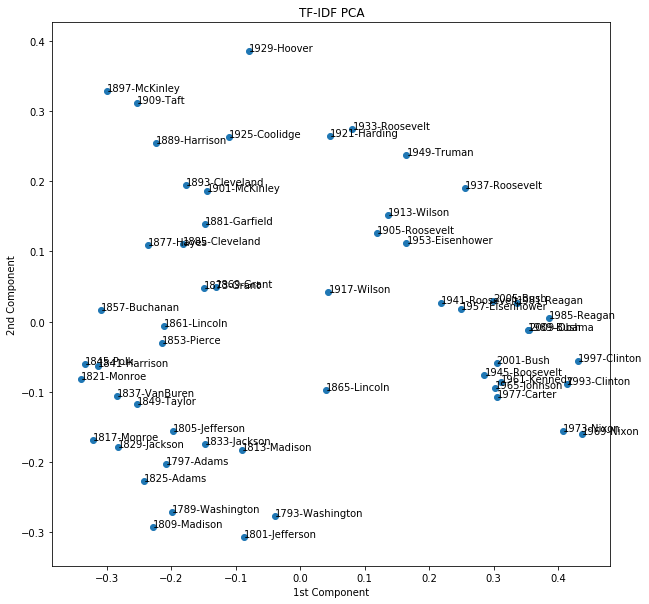

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(documents_tfidf.todense())
data2D = pca.transform(documents_tfidf.todense())

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data2D[:,0], data2D[:,1])
ax.title.set_text('TF-IDF PCA')
ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
for i, txt in enumerate(inaugural.fileids()):
    ax.annotate(txt.replace('.txt',''), (data2D[i,0], data2D[i,1]))
plt.show()